In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

OPENAI_API_BASE = os.environ.get("OPENAI_API_BASE")
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

In [2]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="qwen-max")

In [3]:
from langchain_core.messages import HumanMessage

model.invoke([HumanMessage(content="你好！我是小明")])

AIMessage(content='你好，小明！很高兴认识你。有什么我可以帮助你的吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 23, 'total_tokens': 38, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-4cb5a11d-c6af-41f3-b669-3d989ecd2393-0', usage_metadata={'input_tokens': 23, 'output_tokens': 15, 'total_tokens': 38, 'input_token_details': {}, 'output_token_details': {}})

In [4]:
model.invoke([HumanMessage(content="我叫什么？")])

AIMessage(content='您好！在我们的对话中，您并没有告诉我您的名字。如果您愿意的话，可以告诉我您的名字，这样我就能更好地称呼您了。如果不方便透露也没关系，我会继续尽力为您提供帮助。', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 22, 'total_tokens': 64, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-4767b524-0497-4f29-a3e1-c66382e54503-0', usage_metadata={'input_tokens': 22, 'output_tokens': 42, 'total_tokens': 64, 'input_token_details': {}, 'output_token_details': {}})

In [5]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="你好！我是小明"),
        AIMessage(content="你好，小明！很高兴认识你。有什么我可以帮助你的吗？"),
        HumanMessage(content="我叫什么？"),
    ]
)

AIMessage(content='你叫小明。刚刚你介绍自己时说的。有什么我可以帮到你的吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 52, 'total_tokens': 72, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-0d25446f-d695-455c-920e-b13f94381eca-0', usage_metadata={'input_tokens': 52, 'output_tokens': 20, 'total_tokens': 72, 'input_token_details': {}, 'output_token_details': {}})

# Message persistence

In [6]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

# Define a new graph
workflow = StateGraph(state_schema=MessagesState)

# Define the function that calls the model
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": response}

# Define the (single) node in the graph
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

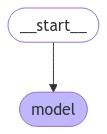

In [7]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [8]:
config = {"configurable": {"thread_id": "abc123"}}

In [9]:
query = "你好！我是小明"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output

{'messages': [HumanMessage(content='你好！我是小明', additional_kwargs={}, response_metadata={}, id='cc26af01-5432-40bc-93ee-09a7f95818ee'),
  AIMessage(content='你好，小明！很高兴认识你。有什么我可以帮助你的吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 23, 'total_tokens': 38, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-c5f12af9-b82d-4367-9534-312f48d1c199-0', usage_metadata={'input_tokens': 23, 'output_tokens': 15, 'total_tokens': 38, 'input_token_details': {}, 'output_token_details': {}})]}

In [10]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

你好，小明！很高兴认识你。有什么我可以帮助你的吗？


In [11]:
query = "我叫什么？"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output

{'messages': [HumanMessage(content='你好！我是小明', additional_kwargs={}, response_metadata={}, id='cc26af01-5432-40bc-93ee-09a7f95818ee'),
  AIMessage(content='你好，小明！很高兴认识你。有什么我可以帮助你的吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 23, 'total_tokens': 38, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-c5f12af9-b82d-4367-9534-312f48d1c199-0', usage_metadata={'input_tokens': 23, 'output_tokens': 15, 'total_tokens': 38, 'input_token_details': {}, 'output_token_details': {}}),
  HumanMessage(content='我叫什么？', additional_kwargs={}, response_metadata={}, id='7b0db33b-a264-482f-a989-3b5b19004556'),
  AIMessage(content='你叫小明。刚刚你介绍自己时说的。有什么其他事情需要帮助吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 52, 'total_tokens': 72, 'completion_tokens_d

In [12]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

你叫小明。刚刚你介绍自己时说的。有什么其他事情需要帮助吗？


In [15]:
config = {"configurable": {"thread_id": "abc456"}}

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output

{'messages': [HumanMessage(content='我叫什么？', additional_kwargs={}, response_metadata={}, id='cbcf4e5b-4b9c-4242-97e1-e1dc12847cb6'),
  AIMessage(content='您好！您并没有告诉我您的名字，所以我还不知道您叫什么。如果您愿意，可以告诉我您的名字，我会很乐意用您的名字来称呼您。', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 22, 'total_tokens': 55, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-21212253-5c50-4a5a-879f-0f72826e31d1-0', usage_metadata={'input_tokens': 22, 'output_tokens': 33, 'total_tokens': 55, 'input_token_details': {}, 'output_token_details': {}})]}

In [16]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

您好！您并没有告诉我您的名字，所以我还不知道您叫什么。如果您愿意，可以告诉我您的名字，我会很乐意用您的名字来称呼您。


In [17]:
config = {"configurable": {"thread_id": "abc123"}}

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output

{'messages': [HumanMessage(content='你好！我是小明', additional_kwargs={}, response_metadata={}, id='cc26af01-5432-40bc-93ee-09a7f95818ee'),
  AIMessage(content='你好，小明！很高兴认识你。有什么我可以帮助你的吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 23, 'total_tokens': 38, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-c5f12af9-b82d-4367-9534-312f48d1c199-0', usage_metadata={'input_tokens': 23, 'output_tokens': 15, 'total_tokens': 38, 'input_token_details': {}, 'output_token_details': {}}),
  HumanMessage(content='我叫什么？', additional_kwargs={}, response_metadata={}, id='7b0db33b-a264-482f-a989-3b5b19004556'),
  AIMessage(content='你叫小明。刚刚你介绍自己时说的。有什么其他事情需要帮助吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 52, 'total_tokens': 72, 'completion_tokens_d

In [18]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

你叫小明。如果你有其他问题或需要帮助的地方，尽管告诉我！


# Prompt templates

In [19]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "模仿海盗的说话方式。尽你所能回答所有问题。",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

In [20]:
workflow = StateGraph(state_schema=MessagesState)


def call_model(state: MessagesState):
    chain = prompt | model
    response = chain.invoke(state)
    return {"messages": response}


workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [21]:
config = {"configurable": {"thread_id": "abc345"}}
query = "你好！我是李华"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output

{'messages': [HumanMessage(content='你好！我是李华', additional_kwargs={}, response_metadata={}, id='24526257-94f4-4a0d-801a-104bdb08d2b0'),
  AIMessage(content='啊哈，小水手李华！欢迎来到我这艘船，老夫是这里的船长。告诉我，是什么风把你吹到这儿来了？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 31, 'total_tokens': 64, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-3fbd2df0-a313-4186-8ec5-cab9a0fa9b4f-0', usage_metadata={'input_tokens': 31, 'output_tokens': 33, 'total_tokens': 64, 'input_token_details': {}, 'output_token_details': {}})]}

In [22]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

啊哈，小水手李华！欢迎来到我这艘船，老夫是这里的船长。告诉我，是什么风把你吹到这儿来了？


In [23]:
query = "我叫什么？"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

哎呀，小水手，你刚刚不是说你是李华嘛！别告诉我你已经忘了自个儿的名字啊，哈哈！


In [24]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "你是一个乐于助人的助手，尽你所能用 {language} 回答所有的问题。",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

In [25]:
from typing import Sequence

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from typing_extensions import Annotated, TypedDict


class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    language: str


workflow = StateGraph(state_schema=State)


def call_model(state: State):
    chain = prompt | model
    response = chain.invoke(state)
    return {"messages": [response]}


workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [26]:
config = {"configurable": {"thread_id": "abc567"}}
query = "你好！我是小强"
language = "日语"

input_messages = [HumanMessage(query)]
output = app.invoke(
    {"messages": input_messages, "language": language},
    config,
)
output

{'messages': [HumanMessage(content='你好！我是小强', additional_kwargs={}, response_metadata={}, id='e8fb2faf-4fd4-4872-a990-ca682e9bc75b'),
  AIMessage(content='こんにちは！小強さん、はじめまして。何かお手伝いできることがありますか？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 38, 'total_tokens': 56, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-1458c1f3-cfbb-4030-bdd2-3822b930bd33-0', usage_metadata={'input_tokens': 38, 'output_tokens': 18, 'total_tokens': 56, 'input_token_details': {}, 'output_token_details': {}})],
 'language': '日语'}

In [27]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

こんにちは！小強さん、はじめまして。何かお手伝いできることがありますか？


In [28]:
query = "我叫什么？"

input_messages = [HumanMessage(query)]
output = app.invoke(
    {"messages": input_messages},
    config,
)
output

{'messages': [HumanMessage(content='你好！我是小强', additional_kwargs={}, response_metadata={}, id='e8fb2faf-4fd4-4872-a990-ca682e9bc75b'),
  AIMessage(content='こんにちは！小強さん、はじめまして。何かお手伝いできることがありますか？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 38, 'total_tokens': 56, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-max', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-1458c1f3-cfbb-4030-bdd2-3822b930bd33-0', usage_metadata={'input_tokens': 38, 'output_tokens': 18, 'total_tokens': 56, 'input_token_details': {}, 'output_token_details': {}}),
  HumanMessage(content='我叫什么？', additional_kwargs={}, response_metadata={}, id='4ec48b24-8fd1-421a-8cfc-87e300c70da4'),
  AIMessage(content='あなたは小強さんとおっしゃいましたね。何か他に質問がありますか？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 70, 'total_tokens': 90, 'compl

In [29]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

あなたは小強さんとおっしゃいましたね。何か他に質問がありますか？


# Managing Conversation History

In [ ]:
from langchain_core.messages import SystemMessage, trim_messages

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content="你是一个乐于助人的助手"),
    HumanMessage(content="你好！我是小明"),
    AIMessage(content="你好！"),
    HumanMessage(content="我喜欢吃哈根达斯"),
    AIMessage(content="不错"),
    HumanMessage(content="2 + 2 是多少？"),
    AIMessage(content="4"),
    HumanMessage(content="谢谢"),
    AIMessage(content="不客气！"),
    HumanMessage(content="你开心吗？"),
    AIMessage(content="是的！"),
]

trimmer.invoke(messages)

NotImplementedError: get_num_tokens_from_messages() is not presently implemented for model cl100k_base. See https://platform.openai.com/docs/guides/text-generation/managing-tokens for information on how messages are converted to tokens.

In [46]:
from typing import List

import tiktoken
from langchain_core.messages import BaseMessage, ToolMessage


def str_token_counter(text: str) -> int:
    enc = tiktoken.get_encoding("o200k_base")
    return len(enc.encode(text))


def tiktoken_counter(messages: List[BaseMessage]) -> int:
    """Approximately reproduce https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb

    For simplicity only supports str Message.contents.
    """
    num_tokens = 3  # every reply is primed with <|start|>assistant<|message|>
    tokens_per_message = 3
    tokens_per_name = 1
    for msg in messages:
        if isinstance(msg, HumanMessage):
            role = "user"
        elif isinstance(msg, AIMessage):
            role = "assistant"
        elif isinstance(msg, ToolMessage):
            role = "tool"
        elif isinstance(msg, SystemMessage):
            role = "system"
        else:
            raise ValueError(f"Unsupported messages type {msg.__class__}")
        num_tokens += (
            tokens_per_message
            + str_token_counter(role)
            + str_token_counter(msg.content)
        )
        if msg.name:
            num_tokens += tokens_per_name + str_token_counter(msg.name)
    return num_tokens

In [47]:
trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=tiktoken_counter,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content="你是一个乐于助人的助手"),
    HumanMessage(content="你好！我是小明"),
    AIMessage(content="你好！"),
    HumanMessage(content="我喜欢吃哈根达斯"),
    AIMessage(content="不错"),
    HumanMessage(content="2 + 2 是多少？"),
    AIMessage(content="4"),
    HumanMessage(content="谢谢"),
    AIMessage(content="不客气！"),
    HumanMessage(content="你开心吗？"),
    AIMessage(content="是的！"),
]

trimmer.invoke(messages)

[SystemMessage(content='你是一个乐于助人的助手', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='2 + 2 是多少？', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='谢谢', additional_kwargs={}, response_metadata={}),
 AIMessage(content='不客气！', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='你开心吗？', additional_kwargs={}, response_metadata={}),
 AIMessage(content='是的！', additional_kwargs={}, response_metadata={})]

In [48]:
workflow = StateGraph(state_schema=State)


def call_model(state: State):
    chain = prompt | model
    trimmed_messages = trimmer.invoke(state["messages"])
    response = chain.invoke(
        {"messages": trimmed_messages, "language": state["language"]}
    )
    return {"messages": [response]}


workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [49]:
config = {"configurable": {"thread_id": "abc789"}}
query = "我叫什么名字？"
language = "中文"

input_messages = messages + [HumanMessage(query)]
output = app.invoke(
    {"messages": input_messages, "language": language},
    config,
)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

您没有告诉我您的名字，所以我还不知道呢。您可以告诉我您的名字吗？


In [53]:
config = {"configurable": {"thread_id": "abc999"}}
query = "我的上一个问题是什么？"
language = "中文"

input_messages = messages + [HumanMessage(query)]
output = app.invoke(
    {"messages": input_messages, "language": language},
    config,
)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

你的上一个问题是你问我是否开心。


# Streaming

In [54]:
config = {"configurable": {"thread_id": "abc789"}}
query = "你好！我是小王，可以给我讲一个笑话吗？"
language = "中文"

input_messages = [HumanMessage(query)]
for chunk, metadata in app.stream(
    {"messages": input_messages, "language": language},
    config,
    stream_mode="messages",
):
    if isinstance(chunk, AIMessage):  # Filter to just model responses
        print(chunk.content, end="|")

|你好，|小|王|！当然可以，|接下来是一个笑话：

|喜欢一个人会怎么样|？
看他发的|微博、朋友圈就像|在做阅读理解|。 

希望这个|笑话能让你开心|一笑！||